In [1]:
import random
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings(action='ignore') 

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(777) # Seed 고정

import seaborn as sns

In [2]:
train_path = './train_data.csv'
test_path = './test_data.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train = train.drop(['motor_rpm','motor_temp'],axis=1)
test = test.drop(['motor_rpm','motor_temp'],axis=1)
train = train[train['motor_vibe'] < 10]
train = train.drop('out_pressure',axis=1)
train_type = [train[train['type'] == i].drop('type',axis=1) for i in range(8)]
test = test.drop('out_pressure',axis=1)
test_type = [test[test['type'] == i].drop('type',axis=1) for i in range(8)]

In [3]:
train_type[0]

,air_inflow,air_end_temp,motor_current,motor_vibe
0,1.59,41.00,20.53,2.93
1,2.97,59.28,38.40,3.75
2,1.91,45.29,24.73,3.12
3,2.37,51.33,30.63,3.39
4,1.90,45.21,24.65,3.12
...,...,...,...,...
427,1.32,37.49,17.10,2.78
428,1.80,43.85,23.32,3.06
429,2.79,56.99,36.17,3.64
430,2.25,49.79,29.13,3.32


In [4]:
# from sklearn.semi_supervised import 
from sklearn.preprocessing import StandardScaler

In [5]:
train.describe()

,air_inflow,air_end_temp,motor_current,motor_vibe,type
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,2.133731,49.011136,27.541528,3.336788,2.970168
std,1.204414,8.735553,13.628776,0.649495,2.231751
min,0.330000,32.030000,5.340000,1.970000,0.000000
25%,1.280000,41.600000,17.150000,2.880000,1.000000
50%,1.960000,48.990000,25.950000,3.250000,3.000000
75%,2.830000,56.380000,36.055000,3.720000,5.000000
max,6.220000,64.960000,72.000000,5.180000,7.000000


In [6]:
test.describe()

,air_inflow,air_end_temp,motor_current,motor_vibe,type
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,27.417935,3.345523,2.957369
std,1.163998,8.686208,13.234089,0.644199,2.229811
min,0.340000,32.080000,5.370000,1.970000,0.000000
25%,1.280000,41.510000,17.200000,2.890000,1.000000
50%,1.940000,48.760000,26.170000,3.260000,3.000000
75%,2.770000,56.580000,35.860000,3.730000,5.000000
max,6.240000,65.540000,74.000000,6.260000,7.000000


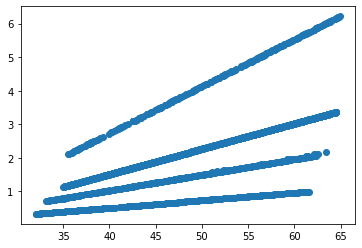

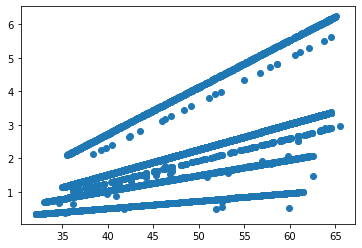

In [7]:
plt.scatter(train['air_end_temp'],train['air_inflow'])
plt.show()
plt.scatter(test['air_end_temp'],test['air_inflow'])

In [8]:
# def train_preprocessing(df_):
#     df = df_.copy()
    
#     # type 1 -> motor_vibration 10 이상 제거
#     df_type_1 = df.loc[df.type == 1]
#     df_type_1_outofdist_index = df_type_1.loc[df_type_1.motor_vibe.values > 10.0].index
#     df.drop(index = df_type_1_outofdist_index, inplace = True)
    
#     # 마력수준에 따른 데이터분할
#     # 마력 10: type 2
#     # 마력 20: type 1
#     # 마력 30: type 0, 4, 5, 6, 7
#     # 마력 50: type 3
    
#     df_0_power30 = df.loc[df.type == 0]
#     df_1_power20 = df.loc[df.type == 1]
#     df_2_power10 = df.loc[df.type == 2]
#     df_3_power50 = df.loc[df.type == 3]
#     df_4_power30 = df.loc[df.type == 4]
#     df_5_power30 = df.loc[df.type == 5]
#     df_6_power30 = df.loc[df.type == 6]
#     df_7_power30 = df.loc[df.type == 7]
    
#     df_power10 = df_2_power10
#     df_power20 = df_1_power20
#     df_power30 = pd.concat([df_0_power30, df_4_power30, df_5_power30, df_6_power30, df_7_power30], axis = 0)
#     df_power50 = df_3_power50
    
#     # drop out_pressure columns
#     df_power10.drop(columns = ['out_pressure', 'type'], inplace = True)
#     df_power20.drop(columns = ['out_pressure', 'type'], inplace = True)
#     df_power30.drop(columns = ['out_pressure', 'type'], inplace = True)
#     df_power50.drop(columns = ['out_pressure', 'type'], inplace = True)
#     return df_power10, df_power20, df_power30, df_power50

# def test_preprocessing(df_):
#     df = df_.copy()
    
#     # type 1 -> motor_vibration 10 이상 제거
# #     df_type_1 = df.loc[df.type == 1]
# #     df_type_1_outofdist_index = df_type_1.loc[df_type_1.motor_vibe.values > 10.0].index
# #     df.drop(index = df_type_1_outofdist_index, inplace = True)
    
#     # 마력수준에 따른 데이터분할
#     # 마력 10: type 2
#     # 마력 20: type 1
#     # 마력 30: type 0, 4, 5, 6, 7
#     # 마력 50: type 3
    
#     df_0_power30 = df.loc[df.type == 0]
#     df_1_power20 = df.loc[df.type == 1]
#     df_2_power10 = df.loc[df.type == 2]
#     df_3_power50 = df.loc[df.type == 3]
#     df_4_power30 = df.loc[df.type == 4]
#     df_5_power30 = df.loc[df.type == 5]
#     df_6_power30 = df.loc[df.type == 6]
#     df_7_power30 = df.loc[df.type == 7]
    
#     df_power10 = df_2_power10
#     df_power20 = df_1_power20
#     df_power30 = pd.concat([df_0_power30, df_4_power30, df_5_power30, df_6_power30, df_7_power30], axis = 0)
#     df_power50 = df_3_power50
    
#     # drop out_pressure columns
#     df_power10.drop(columns = ['out_pressure', 'type'], inplace = True)
#     df_power20.drop(columns = ['out_pressure', 'type'], inplace = True)
#     df_power30.drop(columns = ['out_pressure', 'type'], inplace = True)
#     df_power50.drop(columns = ['out_pressure', 'type'], inplace = True)
#     return df_power10, df_power20, df_power30, df_power50

# train_power10, train_power20, train_power30, train_power50 = train_preprocessing(train)
# test_power10, test_power20, test_power30, test_power50 = test_preprocessing(test)
# train_power10.shape, train_power20.shape, train_power30.shape, train_power50.shape

In [9]:
# train_power20 = train_power20[train_power20['air_inflow'] < 2.1]

In [10]:
# for i in train_power10.columns:
#     plt.title(i)
#     plt.scatter(range(len(train_power10)),train_power10[i])
#     plt.show()

In [15]:
from pycaret import regression
reg_target = 'motor_vibe'
answer = []
for tr in train_type:
    regression.setup(data=tr,target=reg_target,fold=2)
    answer.append(regression.compare_models(sort='MAE',n_select=1,fold=2))

# regression.setup(data=train_power20,target=reg_target,remove_outliers=True)
# best_pw20 = regression.compare_models(sort='MSE',n_select=1,fold=10)

# regression.setup(data=train_power30,target=reg_target,remove_outliers=True)
# best_pw30 = regression.compare_models(sort='MSE',n_select=1,fold=10)

# regression.setup(data=train_power50,target=reg_target,remove_outliers=True)
# best_pw50 = regression.compare_models(sort='MSE',n_select=1,fold=10)

,Description,Value
0,Session id,2129
1,Target,motor_vibe
2,Target type,Regression
3,Original data shape,"(432, 4)"
4,Transformed data shape,"(432, 4)"
5,Transformed train set shape,"(302, 4)"
6,Transformed test set shape,"(130, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:17:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 2 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0025,0.0000,0.0029,0.9999,0.0007,0.0008,2.1600
ridge,Ridge Regression,0.0025,0.0000,0.0029,0.9999,0.0007,0.0008,3.7250
lar,Least Angle Regression,0.0025,0.0000,0.0029,0.9999,0.0007,0.0008,0.9600
omp,Orthogonal Matching Pursuit,0.0025,0.0000,0.0029,0.9999,0.0007,0.0008,0.9000
br,Bayesian Ridge,0.0025,0.0000,0.0029,0.9999,0.0007,0.0008,1.0000
en,Elastic Net,0.0519,0.0036,0.0599,0.9756,0.0140,0.0158,3.9850
par,Passive Aggressive Regressor,0.0575,0.0045,0.0670,0.9693,0.0153,0.0172,0.9050
lasso,Lasso Regression,0.1007,0.0135,0.1161,0.9082,0.0271,0.0306,3.7150
llar,Lasso Least Angle Regression,0.1007,0.0135,0.1161,0.9082,0.0271,0.0306,0.9700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Exception ignored in: <function FastMemory.__del__ at 0x000001367DF5A160>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\pycaret\internal\memory.py", line 458, in __del__
    self.reduce_size()
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\pycaret\internal\memory.py", line 444, in reduce_size
    return super().reduce_size()
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\joblib\memory.py", line 999, in reduce_size
    self.store_backend.reduce_store_size(self.bytes_limit)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\joblib\_store_backends.py", line 281, in reduce_store_size
    items_to_delete = self._get_items_to_delete(bytes_limit)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\joblib\_store_backends.py", line 300, in _get_items_to_delete
    items = self.get_items()
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\joblib\_store_backends.py", line 

KeyboardInterrupt: 

In [ ]:
test = pd.read_csv('./test_data.csv')
tp = [0 for _ in range(len(test))]
for i in test[test['out_pressure'] < 0.7].index:
    tp[i] = 1

In [ ]:
sum(tp)

In [ ]:
tar = []
for i in range(8):
    answer[i].fit(train_type[i].drop(reg_target,axis=1),train_type[i][reg_target])
    pred = answer[i].predict(test_type[i].drop(reg_target,axis=1))
    tar.extend(list(pred))
test['label'] = tar
test

In [ ]:
sns.scatterplot(test[reg_target] - test['label'])
# plt.ylim(-0.5,0.5)

(-0.01, 0.01)

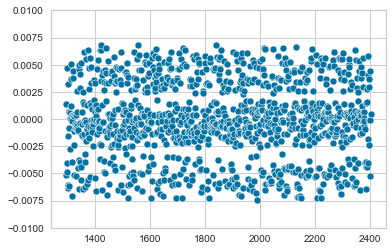

In [182]:
type_ = 1
plot_tmp = test[test['type'] == type_][reg_target] - test[test['type'] == type_]['label']
sns.scatterplot(plot_tmp)
plt.ylim(-0.01,0.01)


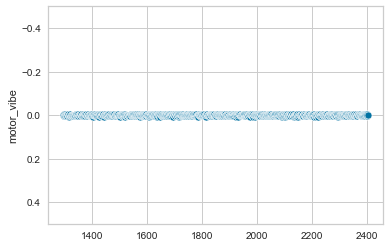

In [183]:
answer[type_].fit(train_type[type_].drop(reg_target,axis=1),train_type[type_][reg_target])
pred = answer[type_].predict(test_type[type_].drop(reg_target,axis=1))
sns.scatterplot(pred - test_type[type_][reg_target])
plt.ylim(0.5,-0.5)

tar = pred - test_type[type_][reg_target]
for i in tar.index:
    if tar[i] > 0.01 or tar[i] < -0.01:
        tp[i] = 1

In [184]:
sum(tp)

328

In [41]:
# temp = test['air_end_temp'] - test['label']
# for i in temp.index:
#     if temp[i] > 0.15 or temp[i] < -0.15:
#         tp[i] = 1

In [42]:
# sum(tp)

282

In [43]:
test['label'] = tp
test

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,0
...,...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7,0
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7,0
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7,0
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7,0


In [17]:
test[(test['type'] == 1) & (test['label'] == 0)]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
1296,1.95,59.83,0.7,28.81,3346.0,75.18,3.66,1,0
1306,1.01,39.63,0.7,14.90,1730.0,57.22,2.76,1,0
1310,1.27,45.24,0.7,18.76,2179.0,62.21,3.01,1,0
1321,1.93,59.39,0.7,28.51,3311.0,74.79,3.64,1,0
1322,0.88,36.79,0.7,12.94,1503.0,54.70,2.64,1,0
...,...,...,...,...,...,...,...,...,...
2393,1.54,50.98,0.7,22.72,2638.0,67.31,3.27,1,0
2396,1.54,50.96,0.7,22.71,2637.0,67.30,3.27,1,0
2397,0.85,36.19,0.7,12.53,1455.0,54.17,2.61,1,0
2399,1.05,40.44,0.7,15.46,1795.0,57.94,2.80,1,0


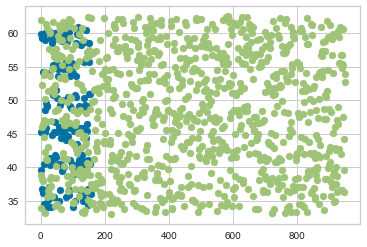

In [18]:
plt.scatter(range(len(test[(test['type'] == 1) & (test['label'] == 0)])),test[(test['type'] == 1) & (test['label'] == 0)]['air_end_temp'])
plt.scatter(range(len(test[(test['type'] == 1) & (test['label'] == 1)])),test[(test['type'] == 1) & (test['label'] == 1)]['air_end_temp'])

In [19]:
# best_pw10.fit(train_power10.drop(reg_target,axis=1),train_power10[reg_target])
# pred = best_pw10.predict(test_power10.drop(reg_target,axis=1))
# sns.scatterplot(pred - test_power10[reg_target])

In [20]:
# tar = pred - test_power10[reg_target]
# tar.index
# for i in tar.index:
#     if tar[i] > 0.006 or tar[i] < -0.006:
#         answer[i] = 1

In [21]:
sum(answer)

TypeError: unsupported operand type(s) for +: 'int' and 'LinearRegression'

In [ ]:
best_pw20.fit(train_power20.drop(reg_target,axis=1),train_power20[reg_target])
pred = best_pw20.predict(test_power20.drop(reg_target,axis=1))
sns.scatterplot(pred - test_power20[reg_target])
plt.ylim(0.025,-0.025)

tar = pred - test_power20[reg_target]
for i in tar.index:
    if tar[i] > 0.1 or tar[i] < -0.1:
        answer[i] = 1

In [ ]:
best_pw30.fit(train_power30.drop(reg_target,axis=1),train_power30[reg_target])
pred = best_pw30.predict(test_power30.drop(reg_target,axis=1))
sns.scatterplot(pred - test_power30[reg_target])
plt.ylim(0.025,-0.025)

tar = pred - test_power30[reg_target]
for i in tar.index:
    if tar[i] > 0.1 or tar[i] < -0.1:
        answer[i] = 1

In [ ]:
sum(answer)

In [ ]:
best_pw50.fit(train_power50.drop(reg_target,axis=1),train_power50[reg_target])
pred = best_pw50.predict(test_power50.drop(reg_target,axis=1))
sns.scatterplot(pred - test_power50[reg_target])
plt.ylim(0.025,-0.025)

tar = pred - test_power50[reg_target]
for i in tar.index:
    if tar[i] > 0.1 or tar[i] < -0.1:
        answer[i] = 1

In [ ]:
sum(answer)

In [185]:
sub = pd.read_csv('./answer_sample.csv')
sub['label'] = tp
sub.set_index('type')
sub.to_csv(f'./submission_answer.csv')